In [1]:
import numpy as np
import pandas as pd
import thinfilm as tm
import material as ml
from scipy.optimize import differential_evolution, minimize
import matplotlib.pyplot as plt

air = ml.Non_Dispersion(1)
OC = ml.open_material('OC_LENS', 'Material')
SiO2 = ml.open_material('SiO2_LENS', 'Sellmeier') 
SiN = ml.open_material('SiN_LENS', 'Sellmeier')
ITO = ml.open_material('ITO_LENS', 'Sellmeier')
sodalime = ml.open_material('sodalime', 'Material')

R_scan = pd.read_csv('./spectrum/LENS/rev1/R_5_B.csv')['SCAN'].values
wl = np.linspace(400, 700, 301)

R_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sodalime],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

fom = lambda th:sum(abs(R_hypo(th)-R_scan/100))

In [31]:
sol = differential_evolution(fom, [(2000,2400),(8,15),(40,80),(23,28),(40,60),(7,12)])
print(sol.x)

[2126.49663538   13.38030814   40.           28.           48.52797989
    7.28383806]


In [15]:
sol2 = minimize(fom, sol.x)
print(sol2.x)

[2113.67044515   20.24114817   21.29727052   64.74504189   34.29554813
   13.13392505]


In [20]:
m1 = [1712.70252975,16.60958357,31.22948534,31.,36.28899155,9.75257661]
m2 = [1709.83443976,20.8817858,21.54939596,57.01125283,32.74004512,11.92598334]

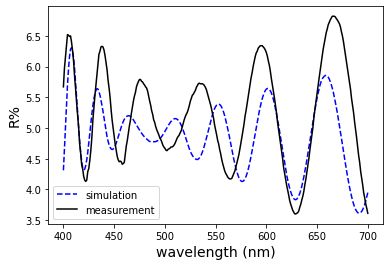

In [32]:
tk = sol.x
plt.plot(wl, 100*R_hypo(tk), '--b', label = 'simulation')
plt.plot(wl, R_scan, '-k', label = 'measurement')
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)', fontsize = 14)
plt.ylabel('R%', fontsize = 14)
#plt.savefig('LENS_rev1_reflection_blacktap.png')
plt.show()

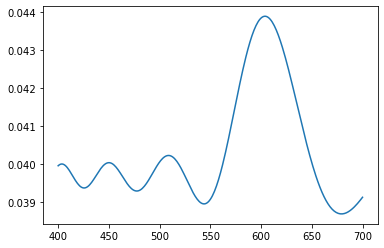

In [12]:
a0 = ml.Non_Dispersion(1.50)
a1 = ml.Non_Dispersion(1.505)
a2 = ml.Non_Dispersion(1.51)
a3 = ml.Non_Dispersion(1.515)
a4 = ml.Non_Dispersion(1.52)
a5 = ml.Non_Dispersion(1.525)
a6 = ml.Non_Dispersion(1.53)

mm = tm.Design(
    [air, a0, a1, a2, a3,a4, a5, a6],
    [None, 200,200,200, 200, 200, 200,None]
).reflectance(wl)

plt.plot(wl, mm)
plt.show()